In [124]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [125]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [126]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 1
ypole = 2
zpole = -6

xpos = 0.6
ypos = 0.6
zpos = 0.6

sim.add_dipole(xpos, ypos, zpos, xpole, ypole, zpole)
#sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
#sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [127]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [128]:
model = MultiPoleModel(moments=1, lrate=0.00025, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=.0002)
test_epochs = 500

In [129]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 332346.12
epoch  1 --- Loss --- 330902.4
epoch  2 --- Loss --- 328441.4
epoch  3 --- Loss --- 324258.56
epoch  4 --- Loss --- 317313.34
epoch  5 --- Loss --- 306134.6
epoch  6 --- Loss --- 288658.4
epoch  7 --- Loss --- 262057.55
epoch  8 --- Loss --- 224404.38
epoch  9 --- Loss --- 179599.75
epoch  10 --- Loss --- 141291.1
epoch  11 --- Loss --- 119681.28
epoch  12 --- Loss --- 110409.3
epoch  13 --- Loss --- 105554.77
epoch  14 --- Loss --- 101964.1
epoch  15 --- Loss --- 98997.72
epoch  16 --- Loss --- 96444.84
epoch  17 --- Loss --- 94209.664
epoch  18 --- Loss --- 92225.69
epoch  19 --- Loss --- 90443.53
epoch  20 --- Loss --- 88830.37
epoch  21 --- Loss --- 87360.03
epoch  22 --- Loss --- 86012.48
epoch  23 --- Loss --- 84771.75
epoch  24 --- Loss --- 83624.984
epoch  25 --- Loss --- 82561.484
epoch  26 --- Loss --- 81572.36
epoch  27 --- Loss --- 80650.14
epoch  28 --- Loss --- 79788.36
epoch  29 --- Loss --- 78981.484
epoch  30 --- Loss --- 78224.64
epoch 

KeyboardInterrupt: 

In [ ]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 6.141951366265615 minutes


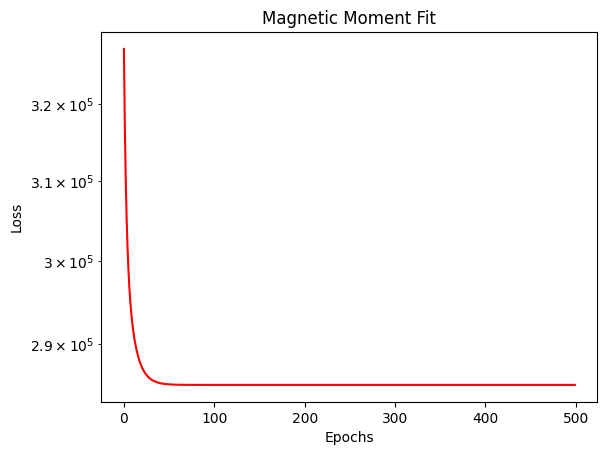

In [ ]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[2.2521243 2.5310776 4.329831 ]]
Input
[[1, 2, -6]]


In [ ]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 225.2124309539795
Percentage Accuracy Y-axis 73.44611883163452
Percentage Accuracy Z-axis -72.16385205586752
********************************
Average Accuracy:  75.49823257658217
